In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.display import display

# Packages for custom plot styles
from matplotlib import rc
from matplotlib.gridspec import GridSpec
rc("font", family="serif", size=11)

In [322]:
nstars = 180
nparams = nstars*11+(3*3)+1
print(nparams)

#df = pd.read_csv('hydra/tau_models.csv', names=['kic', 'dnu',
#                    'numax', 'epsilon', 'alpha', 'A', 'G', 'phi', 'tau'])
df = pd.read_csv('../data/stanfits/tau_models_200.csv', names=['kic', 'dnu',
                    'numax', 'epsilon', 'alpha', 'A', 'G', 'phi', 'tau'])
df['kic'] = df['kic'].astype(int)
display(df.describe())

#hier = pd.read_csv('hydra/fullsumm_tau.txt', skiprows=4, nrows=nparams, delim_whitespace=True)
hier = pd.read_csv('../data/stanfits/fullsumm_tau_200.txt', skiprows=4, nrows=nparams, delim_whitespace=True)
#display(hier)
epsA = hier.loc['epsA']['mean']#:'sd']
epsB = hier.loc['epsB']['mean']
alA = hier.loc['alA']['mean']
alB = hier.loc['alB']['mean']
AA = hier.loc['AA']['mean']
AB = hier.loc['AB']['mean']

1990


,kic,dnu,numax,epsilon,alpha,A,G,phi,tau
count,1.800000e+02,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,8.062036e+06,6.014734,64.881057,0.087833,0.011725,0.025295,2.980390,1.324569,9.208480
std,2.994911e+06,1.244674,18.024351,0.054881,0.002984,0.004617,0.422915,0.882915,2.141780
min,1.576469e+06,4.439198,45.023484,-0.035577,0.004481,0.015081,2.035830,-2.534792,1.307431
25%,5.287405e+06,4.926064,50.400800,0.045192,0.009663,0.022188,2.670160,0.793753,8.182282
50%,9.291249e+06,5.757464,58.308705,0.092478,0.011471,0.025015,2.985900,1.561386,9.890756
75%,1.052672e+07,6.620497,75.741385,0.122252,0.013722,0.028270,3.263167,1.915287,10.583108
max,1.236654e+07,9.211847,104.800514,0.220850,0.020631,0.047762,4.286473,3.254867,14.123466


In [325]:
dnus = np.linspace(df['dnu'].min(), df['dnu'].max(), 20)
As = AA * dnus**(-AB)
alphas = alA * dnus**(-alB)
epsilons = epsA + epsB*np.log(dnus)
depsilons = epsA + epsB*np.log(df['dnu'])
df['eps_resi'] = df['epsilon'] - depsilons

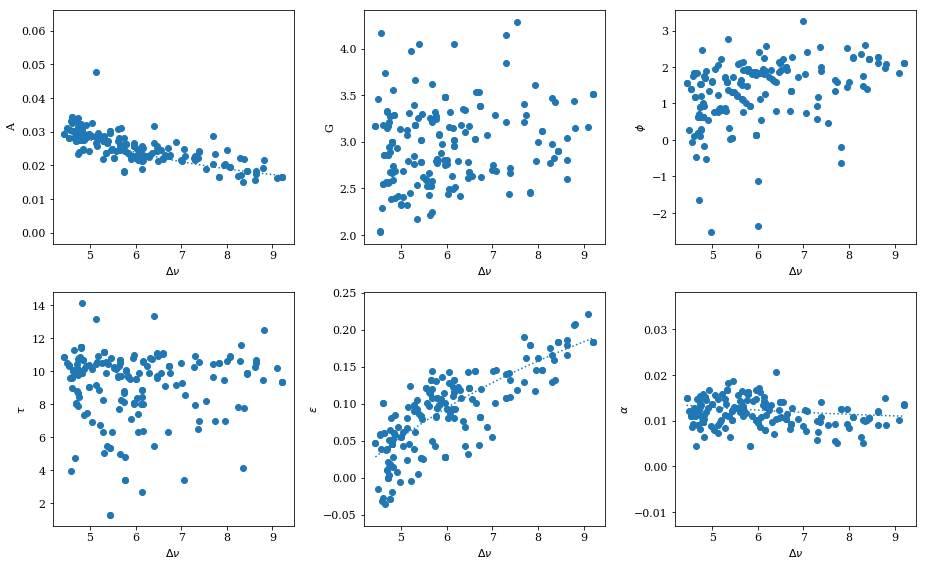

In [324]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(13,8))
ax1.scatter(df['dnu'], df['A'])
ax1.plot(dnus, As, ':')
ax1.set_xlabel(r'$\Delta\nu$')
ax1.set_ylabel('A')

ax2.scatter(df['dnu'], df['G'])
ax2.set_xlabel(r'$\Delta\nu$')
ax2.set_ylabel('G')

ax3.scatter(df['dnu'], df['phi'])
ax3.set_xlabel(r'$\Delta\nu$')
ax3.set_ylabel(r'$\phi$')

ax4.scatter(df['dnu'], df['tau'])
ax4.set_xlabel(r'$\Delta\nu$')
ax4.set_ylabel(r'$\tau$')

ax5.scatter(df['dnu'], df['epsilon'])
ax5.plot(dnus, epsilons, ':')
ax5.set_xlabel(r'$\Delta\nu$')
ax5.set_ylabel(r'$\epsilon$')

ax6.scatter(df['dnu'], df['alpha'])
ax6.plot(dnus, alphas, ':')
ax6.set_xlabel(r'$\Delta\nu$')
ax6.set_ylabel(r'$\alpha$')

plt.tight_layout()
plt.show()

In [319]:
apokasc = pd.read_csv('../data/APOKASCfull.csv', usecols=['KIC', 'Teff', '[M/H]2', 'M1', 'R1'])
apokasc = apokasc.replace('        ', np.nan)

metals = []
temps = []
for i in df['kic']:
    if any(apokasc['KIC'] == i):
        z = apokasc.loc[(apokasc.KIC == i)]['[M/H]2'].values
        T = apokasc.loc[(apokasc.KIC == i)]['Teff'].values
        metals.append(z[0])
        temps.append(T[0])
    else:
        metals.append(np.nan)
        temps.append(np.nan)

df['[M/H]'] = metals
df['Teff'] = temps
df['Teff'] = df['Teff'].astype(float)
df = df.dropna()
#df = df[pd.notnull(df['Teff'])]
display(df.head(50))

,kic,dnu,numax,epsilon,alpha,A,G,phi,tau,[M/H],Teff
0,11413138,4.632518,46.968629,0.060486,0.010972,0.030305,2.855391,1.176869,10.075350,0.19,4588.0
1,9650527,5.288710,55.238652,0.039107,0.008492,0.021828,3.397665,0.886986,8.248579,-0.17,4971.0
2,5024967,4.700413,46.370521,0.010081,0.012243,0.027122,3.321913,0.641729,10.016045,0.07,4623.0
3,9535399,5.757389,58.091065,0.082763,0.016057,0.018176,3.248991,1.936384,8.690919,0.35,4662.0
5,5857618,6.313203,72.161716,0.108101,0.009785,0.023122,3.182436,1.658134,10.829450,0.31,4554.0
6,12366537,4.742649,47.456144,0.014981,0.015376,0.023378,2.566905,1.525250,10.717320,-0.18,4917.0
7,9291249,4.600391,45.391682,0.100239,0.011374,0.034248,2.549102,1.842448,9.645382,0.22,4519.0
8,11358669,8.437184,98.181044,0.183178,0.010657,0.018398,2.904823,2.228348,9.893062,0.17,4915.0
9,8759207,7.054452,80.984389,0.101396,0.007705,0.024808,3.287304,0.750720,3.444266,-0.13,4980.0
10,11702195,5.639546,52.310350,0.113915,0.014066,0.028199,2.214835,1.642449,7.736781,-0.46,4759.0


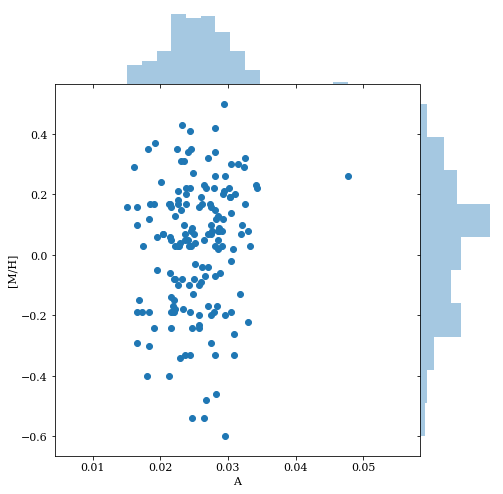

In [317]:
#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))
ax1 = sns.jointplot(df['A'], df['[M/H]'], height=7, space=0)

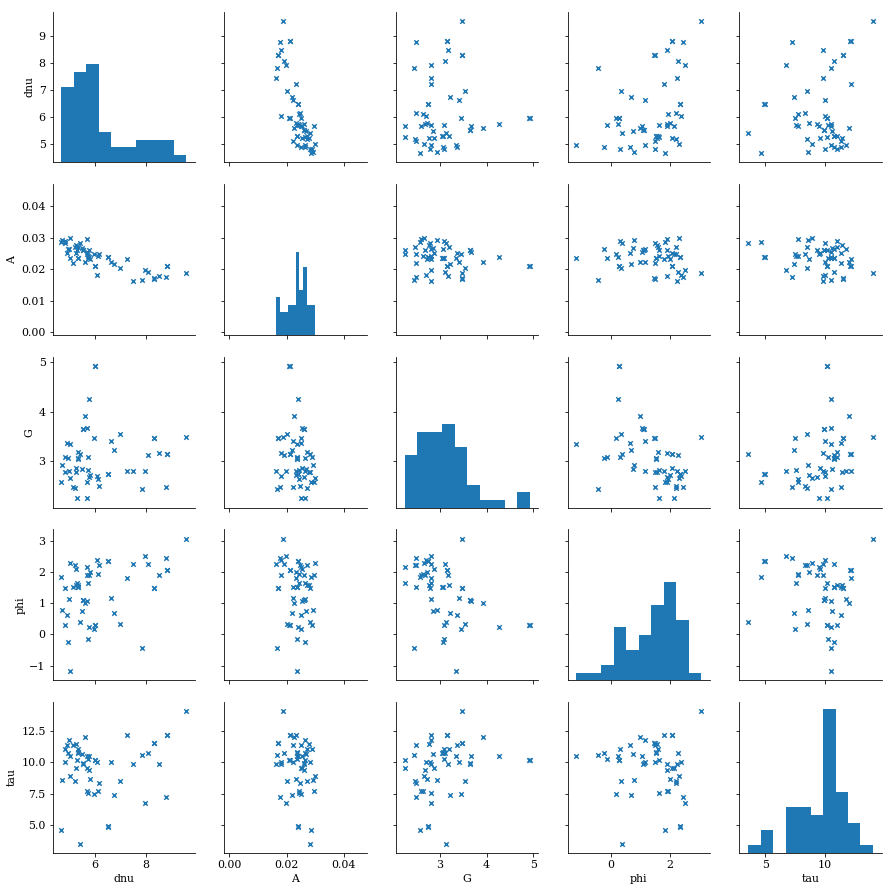

In [278]:
k = np.asarray(df['Teff'].values).astype(float)
k = k/max(k)
#print(k)
g = sns.PairGrid(df, vars=["dnu","A", "G", "phi", "tau"])
#g = g.map_offdiag(plt.scatter, marker='x', s=20, color=k, cmap='viridis')
g = g.map_offdiag(plt.scatter, marker='x', s=20)
g = g.map_diag(plt.hist)

#g = sns.pairplot(df, vars=["dnu","A", "G", "phi", "tau"],
#                  diag_kind='hist', markers='x', hue=df['Teff'])
#                 #plot_kws=dict(s=20, colour=df['Teff'])
#plt.scatter(df['dnu'], df['A'], c=df['Teff'], cmap='viridis')

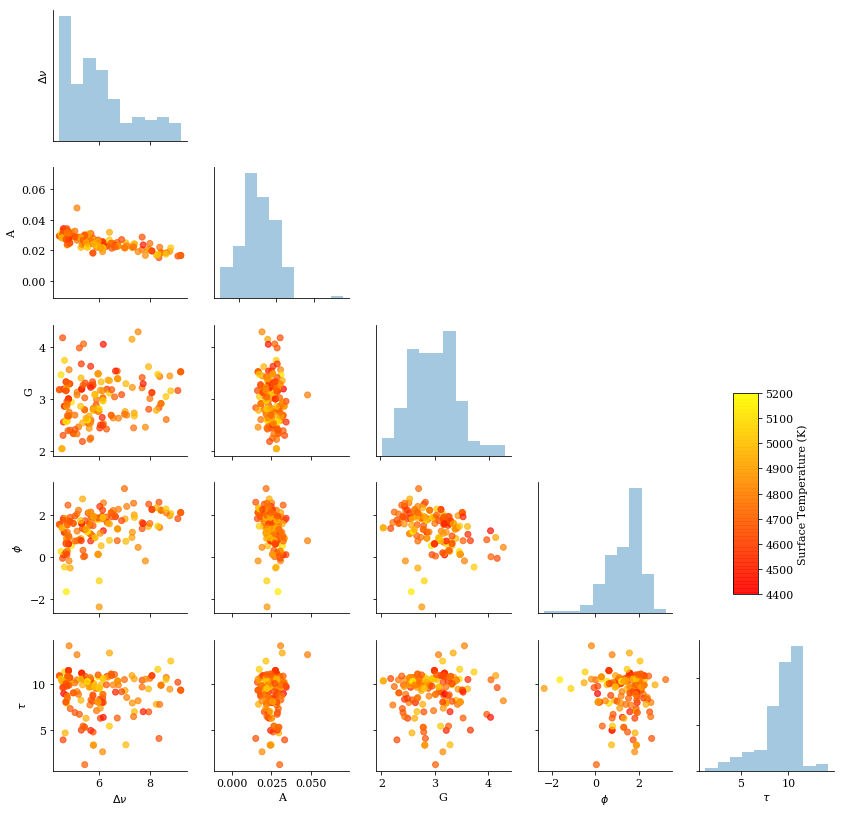

In [320]:
plt.figure(figsize=(14,14))
gs = GridSpec(5, 5)
diag0 = plt.subplot(gs[0, 0:1])
diag1 = plt.subplot(gs[1, 1:2])
diag2 = plt.subplot(gs[2, 2:3])
diag3 = plt.subplot(gs[3, 3:4])
diag4 = plt.subplot(gs[4, 4:5])
ax1a = plt.subplot(gs[1, 0:1])
ax2a = plt.subplot(gs[2, 0:1])
ax2b = plt.subplot(gs[2, 1:2])
ax3a = plt.subplot(gs[3, 0:1])
ax3b = plt.subplot(gs[3, 1:2])
ax3c = plt.subplot(gs[3, 2:3])
ax4a = plt.subplot(gs[4, 0:1])
ax4b = plt.subplot(gs[4, 1:2])
ax4c = plt.subplot(gs[4, 2:3])
ax4d = plt.subplot(gs[4, 3:4])

colours = dict(c=df['Teff'], cmap='viridis', vmin=4400, vmax=5200)
dist_kwargs = dict(kde=False, bins=10)
scat_kwargs = dict(marker='o', alpha=0.7, **colours)

sns.distplot(df['dnu'], ax=diag0, **dist_kwargs)
sns.distplot(df['A'], ax=diag1, **dist_kwargs)
sns.distplot(df['G'], ax=diag2, **dist_kwargs)
sns.distplot(df['phi'], ax=diag3, **dist_kwargs)
sns.distplot(df['tau'], ax=diag4, **dist_kwargs)

a = ax1a.scatter(df['dnu'], df['A'], **scat_kwargs)
ax2a.scatter(df['dnu'], df['G'], **scat_kwargs)
ax2b.scatter(df['A'], df['G'], **scat_kwargs)
ax3a.scatter(df['dnu'], df['phi'], **scat_kwargs)
ax3b.scatter(df['A'], df['phi'], **scat_kwargs)
ax3c.scatter(df['G'], df['phi'], **scat_kwargs)
ax4a.scatter(df['dnu'], df['tau'], **scat_kwargs)
ax4b.scatter(df['A'], df['tau'], **scat_kwargs)
ax4c.scatter(df['G'], df['tau'], **scat_kwargs)
ax4d.scatter(df['phi'], df['tau'], **scat_kwargs)

diags = [diag0, diag1, diag2, diag3]
inner = [ax2b, ax3b, ax3c]
side = [ax1a, ax2a, ax3a]
bottom = [ax4b, ax4c, ax4d, diag4]
ax4a.spines['right'].set_visible(False)
ax4a.spines['top'].set_visible(False)

for i in diags:
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.tick_params(labelbottom=False, labelleft=False, left=False)
    i.set(xlabel='')
for i in inner:
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.tick_params(labelbottom=False, labelleft=False)
for i in side:
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.tick_params(labelbottom=False)
for i in bottom:
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.tick_params(labelleft=False)

diag0.set_ylabel(r'$\Delta\nu$')
ax1a.set_ylabel('A')
ax2a.set_ylabel('G')
ax3a.set_ylabel(r'$\phi$')
ax4a.set_ylabel(r'$\tau$')
#ax2b.set_xlim([0.015, 0.035])

ax4a.set_xlabel(r'$\Delta\nu$')
ax4b.set_xlabel('A')
ax4c.set_xlabel('G')
ax4d.set_xlabel(r'$\phi$')
diag4.set_xlabel(r'$\tau$')

cax = plt.axes([0.8, 0.3, 0.025, 0.2])
cbar = plt.colorbar(a, cax=cax, use_gridspec=True)
cbar.set_label('Surface Temperature (K)')
#plt.tight_layout()
plt.savefig('fitanalysis.pdf')
plt.show()